In [13]:
import sys
sys.path.append('../src')
from utils import save_fig
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

📢 Training ARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11435.581, Time=2.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11240.284, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11238.291, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11238.294, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11236.154, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11323.439, Time=1.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11351.708, Time=1.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-11480.623, Time=2.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-11349.819, Time=0.81 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-11479.821, Time=2.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-11480.136, Time=3.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11471.813, Time=4.25 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-11459.211, Time=2.65 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1148

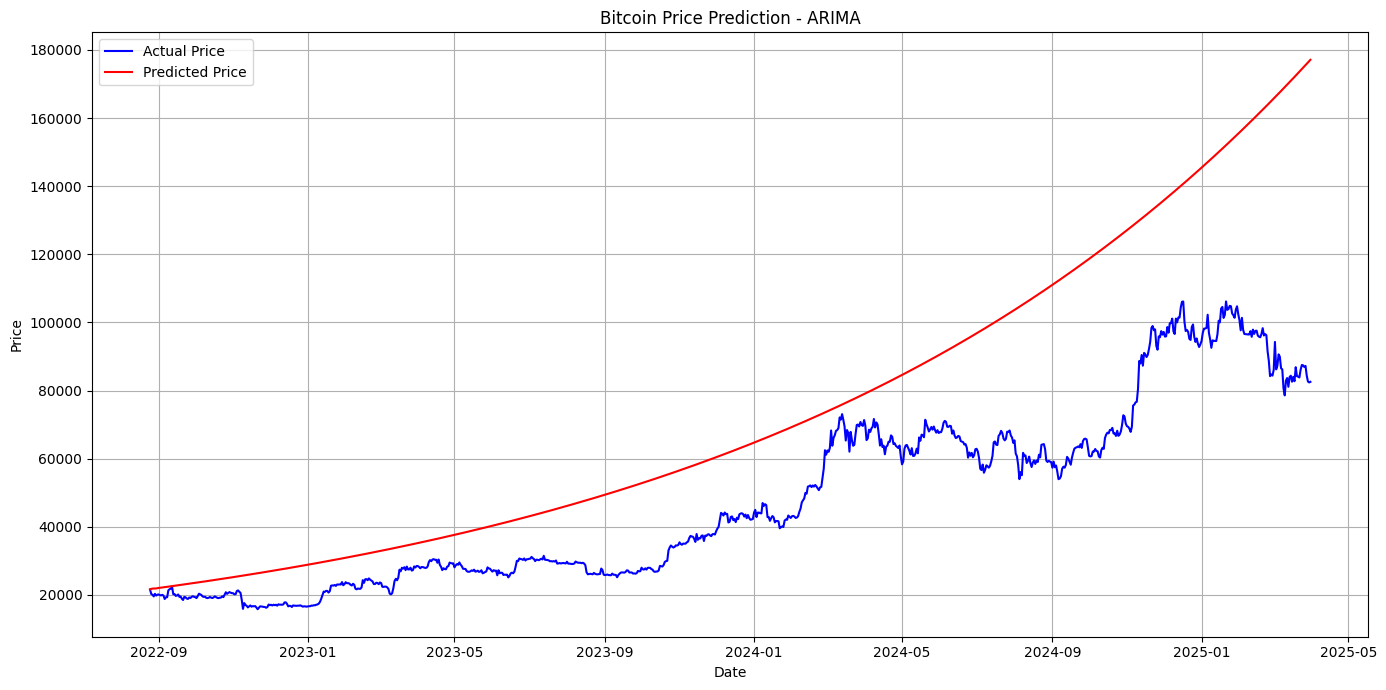

✅ Predictions saved to outputs/arima_predictions.csv
✅ ARIMA Model saved to models/arima_model.pkl


In [33]:
# ---------------------------
# 📚 Import Libraries
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import pickle
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# 📂 Load the Data
# ---------------------------
data = pd.read_csv('../data/processed/btc_clean.csv', parse_dates=['Date'])
data = data.sort_values('Date')

# ---------------------------
# 📈 Prepare Data for ARIMA
# ---------------------------
prices = data['Price']

# Optional: Apply log transformation to stabilize variance
log_prices = np.log(prices)

# Train-Test Split (80-20)
train_size = int(len(log_prices) * 0.8)
train, test = log_prices[:train_size], log_prices[train_size:]

# ---------------------------
# 🔍 Fit Auto ARIMA Model
# ---------------------------
print("📢 Training ARIMA Model...")

arima_model = pm.auto_arima(
    train,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print("✅ ARIMA Model Trained.")

# ---------------------------
# 📈 Forecasting
# ---------------------------
n_periods = len(test)
forecast_log = arima_model.predict(n_periods=n_periods)
forecast = np.exp(forecast_log)  # Reverse log-transform

# Restore actual test prices
actual_test = np.exp(test)

# ---------------------------
# 📋 Evaluation Metrics
# ---------------------------
mae = mean_absolute_error(actual_test, forecast)
mse = mean_squared_error(actual_test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(actual_test, forecast)

print(f"""
📋 ARIMA Model Evaluation Metrics:
   MAE: {mae:.4f}
   MSE: {mse:.4f}
   RMSE: {rmse:.4f}
   R^2: {r2:.4f}
""")

# ---------------------------
# 📊 Plot Actual vs Predicted
# ---------------------------
plt.figure(figsize=(14,7))
plt.plot(data['Date'][train_size:], actual_test, label='Actual Price', color='blue')
plt.plot(data['Date'][train_size:], forecast, label='Predicted Price', color='red')
plt.title('Bitcoin Price Prediction - ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
save_fig('ARIMA_Actual_vs_Predicted')
plt.show()

# ---------------------------
# 💾 Save Forecast to CSV
# ---------------------------
arima_results = pd.DataFrame({
    'Date': data['Date'][train_size:].values,
    'Actual_Price': actual_test,
    'Predicted_Price': forecast
})

arima_results.to_csv('../outputs/metrics/ARIMA_predictions.csv', index=False)
print("✅ Predictions saved to outputs/arima_predictions.csv")

# ---------------------------
# 💾 Save Model
# ---------------------------
with open('../models/arima_model.pkl', 'wb') as f:
    pickle.dump(arima_model, f)
print("✅ ARIMA Model saved to models/arima_model.pkl")


In [34]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(log_prices)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.4311185523474865
p-value: 0.13314533174725995



📢 Training SARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=-11432.962, Time=15.22 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=-11240.284, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=-11236.778, Time=3.26 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=-11236.798, Time=2.53 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=-11236.154, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[30] intercept   : AIC=-11434.745, Time=17.04 sec
 ARIMA(2,1,2)(0,0,0)[30] intercept   : AIC=-11435.581, Time=2.72 sec
 ARIMA(2,1,2)(1,0,0)[30] intercept   : AIC=-11434.793, Time=16.44 sec
 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=-11323.439, Time=1.44 sec
 ARIMA(2,1,1)(0,0,0)[30] intercept   : AIC=-11351.708, Time=1.11 sec
 ARIMA(3,1,2)(0,0,0)[30] intercept   : AIC=-11480.623, Time=2.39 sec
 ARIMA(3,1,2)(1,0,0)[30] intercept   : AIC=-11479.690, Time=18.88 sec
 ARIMA(3,1,2)(0,0,1)[30] intercept   : AIC=-11479.622, Time=19.38 sec
 ARIMA(3,1,2)(1,0,1)[30] in

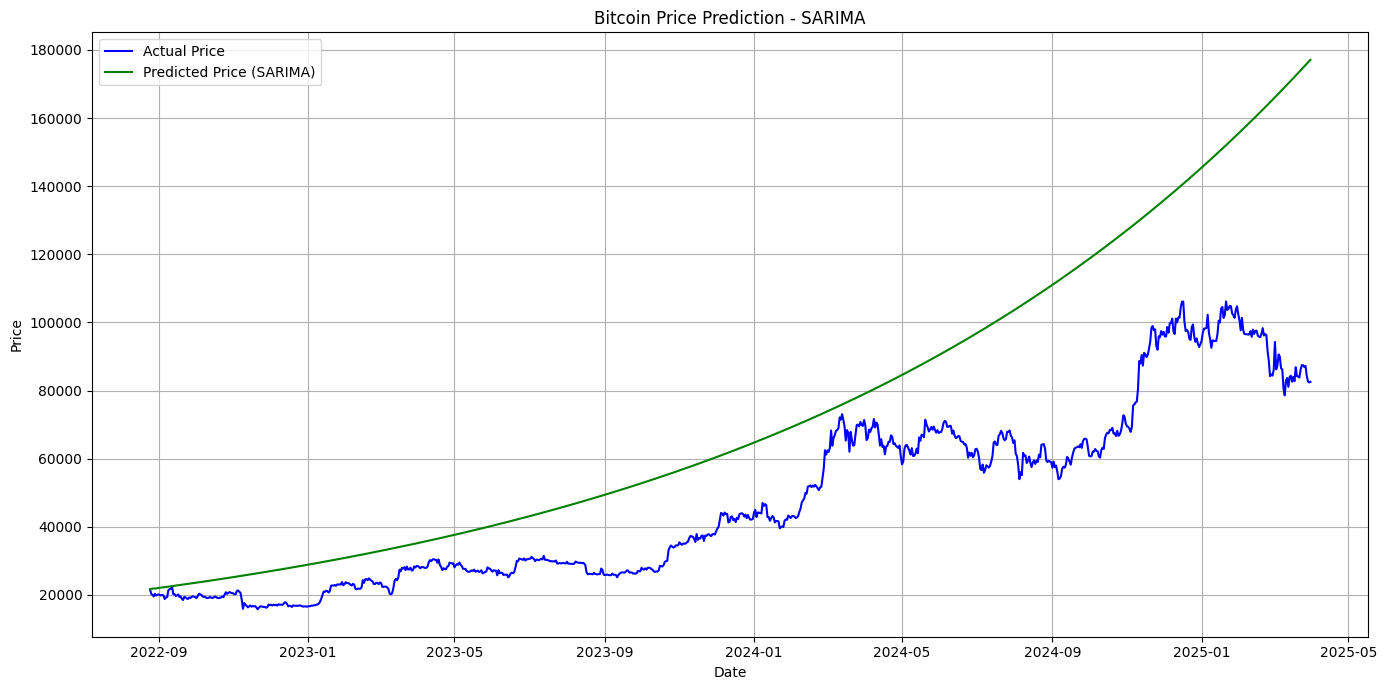

✅ Predictions saved to outputs/sarima_predictions.csv
✅ SARIMA Model saved to models/sarima_model.pkl


In [35]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# ---------------------------
# 📢 SARIMA Modeling (with Seasonality)
# ---------------------------

print("\n📢 Training SARIMA Model...")

# Fit SARIMA model (seasonal=True)
sarima_model = pm.auto_arima(
    train,
    seasonal=True,
    m=30,
    stepwise=True,
    trace=True,
    suppress_warnings=True,
)




print("✅ SARIMA Model Trained.")

# ---------------------------
# 📈 Forecasting
# ---------------------------
n_periods = len(test)
forecast_log_sarima = sarima_model.predict(n_periods=n_periods)
forecast_sarima = np.exp(forecast_log_sarima)  # Reverse log-transform

# ---------------------------
# 📋 Evaluation Metrics
# ---------------------------
mae_sarima = mean_absolute_error(actual_test, forecast_sarima)
mse_sarima = mean_squared_error(actual_test, forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(actual_test, forecast_sarima)

print(f"""
📋 SARIMA Model Evaluation Metrics:
   MAE: {mae_sarima:.4f}
   MSE: {mse_sarima:.4f}
   RMSE: {rmse_sarima:.4f}
   R^2: {r2_sarima:.4f}
""")

# ---------------------------
# 📊 Plot Actual vs Predicted (SARIMA)
# ---------------------------
plt.figure(figsize=(14,7))
plt.plot(data['Date'][train_size:], actual_test, label='Actual Price', color='blue')
plt.plot(data['Date'][train_size:], forecast_sarima, label='Predicted Price (SARIMA)', color='green')
plt.title('Bitcoin Price Prediction - SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
save_fig('SARIMA_Actual_vs_Predicted')
plt.show()

# ---------------------------
# 💾 Save Forecast to CSV
# ---------------------------
sarima_results = pd.DataFrame({
    'Date': data['Date'][train_size:].values,
    'Actual_Price': actual_test,
    'Predicted_Price': forecast_sarima
})

sarima_results.to_csv('../outputs/metrics/SARIMA_predictions.csv', index=False)
print("✅ Predictions saved to outputs/sarima_predictions.csv")

# ---------------------------
# 💾 Save SARIMA Model
# ---------------------------
with open('../models/sarima_model.pkl', 'wb') as f:
    pickle.dump(sarima_model, f)
print("✅ SARIMA Model saved to models/sarima_model.pkl")